In [1]:
from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from machine_modifications.random_graph_functions import *
import networkx as nx
import numpy as np
import math


In [2]:
# Objective is to minimize MRT + E
mrt = True
tie_breaking_rule = 2
plot = False


max_counter = 10
num_task_lst = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50,55,60,65,70,75,80,85,90,95,100]
# min_lb_lst = []
#num_machine_lst = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 50]
# min_lb_lst = []
# min_lb_precise_lst = []

# max_ub_lst = []
# max_ub_precise_lst = []

opt_obj_lst = []
obj_lb_precise_lst = []
obj_ub_precise_lst = []
obj_lb_lst = []

num_tasks = 100

for num_tasks in num_task_lst:
    
    min_lb = float('inf')
    min_lb_precise = float('inf')
    
    max_ub = -float('inf')
    max_ub_precise = -float('inf')
    opt_obj = []
    
    min_ratio = np.infty
    max_ratio = -np.infty
    saved_max_seed = None
    saved_min_seed = None
    max_overall_ratio = - np.infty
    counter = 0
    
    print("On " + str(num_tasks))
    
    while counter != max_counter:
        
        print("Test " + str(counter) )
        # Random
        
       
        
        seed=random.randint(0, 100000)
        edges = num_tasks - 1
        num_machines = random.randint(1, num_tasks)
        G = random_dag(num_tasks, edges, seed=seed)
        
#         G = random_all_fork(num_tasks, seed)
    #     print(seed)
    #     make_graph_visual(G, num_tasks)

        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]

        # Get ordering using modified ETF
        test = Mod_ETF(G, w, s, num_machines, tie_breaking_rule, plot=plot)

    #     # Initialize objective function value
        heuristic_opt = test.obj_value

        # Get pseudosize, convert to speed
        psize, group_interval = approx_psize_homogeneous(G, test.order, test.h, test.t, verbose=False)
        s_prime = psize_to_speed(psize)

        # Get ordering using modified ETF
        test2 = Mod_ETF(G, w, s_prime, num_machines, tie_breaking_rule, plot=plot)

        # Check if the objective function value has improved
        if heuristic_opt > test2.obj_value:
            heuristic_opt = test2.obj_value
            s = s_prime

#         print("Final objective value: " + str(heuristic_opt))

        # Given ordering, find optimal speeds
#         print("From opt check:")
        temp = get_objective_single_ordering(mrt, G, w, test.order, plot=plot, compare=False)
        opt_intervals, s_opt, obj_opt, _ = temp 
        if s_opt[0] != -1:
            counter += 1

            if (heuristic_opt / obj_opt) > max_overall_ratio:
                max_overall_ratio = heuristic_opt / obj_opt

            s_ratios = [s[i] / s_opt[i] for i in range(len(s))]
#             print(s_ratios)

            if max(s_ratios) > max_ratio:
                max_ratio = max(s_ratios)
                saved_max_seed = seed

            if min(s_ratios) < min_ratio:
                min_ratio = min(s_ratios)
                saved_min_seed = seed
                
            obj_lb = 2 * sum(psize_to_speed(lb_lst(G, num_machines, test.order)))
            obj_lb_lst.append([num_tasks, obj_lb])
            
            obj_lb_precise = 2 * sum(psize_to_speed(lb_lst_precise(G, num_machines, test.order, num_concurrent_running_tasks(num_tasks, group_interval))))
            obj_lb_precise_lst.append([num_tasks, obj_lb_precise])
           
            obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, test.order)))
            obj_ub_precise_lst.append([num_tasks, obj_ub_precise])

            opt_obj_lst.append([num_tasks, obj_opt])
           
            print(obj_lb.__round__(2),obj_opt.__round__(2),obj_ub_precise.__round__(2))
            assert(obj_lb.__round__(2) <= obj_opt.__round__(2) <= obj_ub_precise.__round__(2))

        else:
            
            print("SKIP THIS ONE")
    
    
    
   
    
    print(num_tasks, max_overall_ratio)

On 2
Test 0
4.83 4.83 4.83
Test 1
4.0 4.83 4.83
Test 2
4.83 4.83 4.83
Test 3
4.83 4.83 4.83
Test 4
4.0 4.83 4.83
Test 5
4.0 4.83 4.83
Test 6
4.0 4.83 4.83
Test 7
4.0 4.83 4.83
Test 8
4.83 4.83 4.83
Test 9
4.83 4.83 4.83
2 0.9999994045157928
On 5
Test 0
10.0 13.15 14.83
Test 1
16.76 16.76 16.76
Test 2
10.0 13.15 14.83
Test 3
10.0 12.49 13.76
Test 4
10.89 16.76 16.76
Test 5
10.0 14.96 16.23
Test 6
16.76 16.76 16.76
Test 7
10.0 13.3 13.3
Test 8
10.0 14.29 15.76
Test 9
10.45 13.12 13.66
5 1.0120397430006762
On 10
Test 0
20.0 29.94 34.26
Test 1
20.0 26.88 31.95
Test 2
20.0 27.15 31.85
Test 3
20.0 31.81 36.06
Test 4
44.94 44.94 44.94
Test 5
20.0 30.07 33.14
Test 6
20.0 26.59 30.78
Test 7
SKIP THIS ONE
Test 7
20.0 27.11 31.53
Test 8
20.0 32.06 37.54
Test 9
20.0 27.06 30.59
10 1.0309133361085363
On 15
Test 0
30.0 41.7 52.82
Test 1
30.0 44.73 50.13
Test 2
30.0 41.71 45.5
Test 3
30.0 48.22 56.16
Test 4
30.0 47.07 63.96
Test 5
30.0 43.24 58.62
Test 6
SKIP THIS ONE
Test 6
80.94 80.94 80.94
Test 7


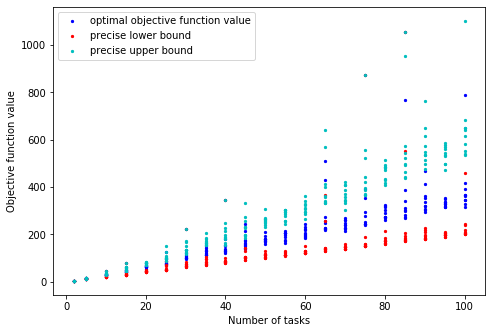

In [5]:
import matplotlib.pyplot as plt
import math








fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

opt_obj_lst = np.array(opt_obj_lst)
obj_lb_precise_lst = np.array(obj_lb_precise_lst)
obj_ub_precise_lst = np.array(obj_ub_precise_lst)
obj_lb_lst = np.array(obj_lb_lst)

#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


plt.scatter(opt_obj_lst[:,0], opt_obj_lst[:,1], s=5, label='optimal objective function value', color='b')
plt.scatter(obj_lb_precise_lst[:,0], obj_lb_precise_lst[:,1],s=5,  label='precise lower bound', color="r")

plt.scatter(obj_ub_precise_lst[:,0], obj_ub_precise_lst[:,1], s=5, label='precise upper bound', color="c")

plt.xlabel('Number of tasks')
plt.ylabel('Objective function value')
plt.legend()
plt.show()